# Online Payment Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/content/new_data.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6362615,False
6362616,False
6362617,False
6362618,False


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
obj_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=["number"]).columns

In [12]:
target ="isFraud"

df[target].value_counts()

,count
isFraud,
0,6354407
1,8213


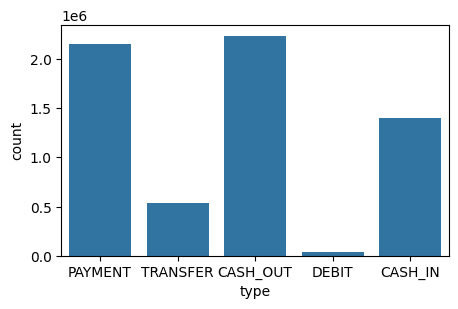

In [11]:
plt.figure(figsize=(5,3))

sns.countplot(x="type", data=df)

plt.show()

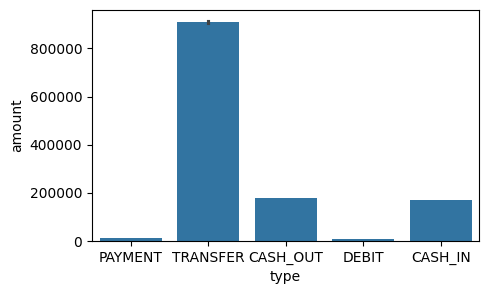

In [13]:
plt.figure(figsize=(5,3))

sns.barplot(x="type",y="amount", data=df)

plt.show()

<Axes: xlabel='step', ylabel='Count'>

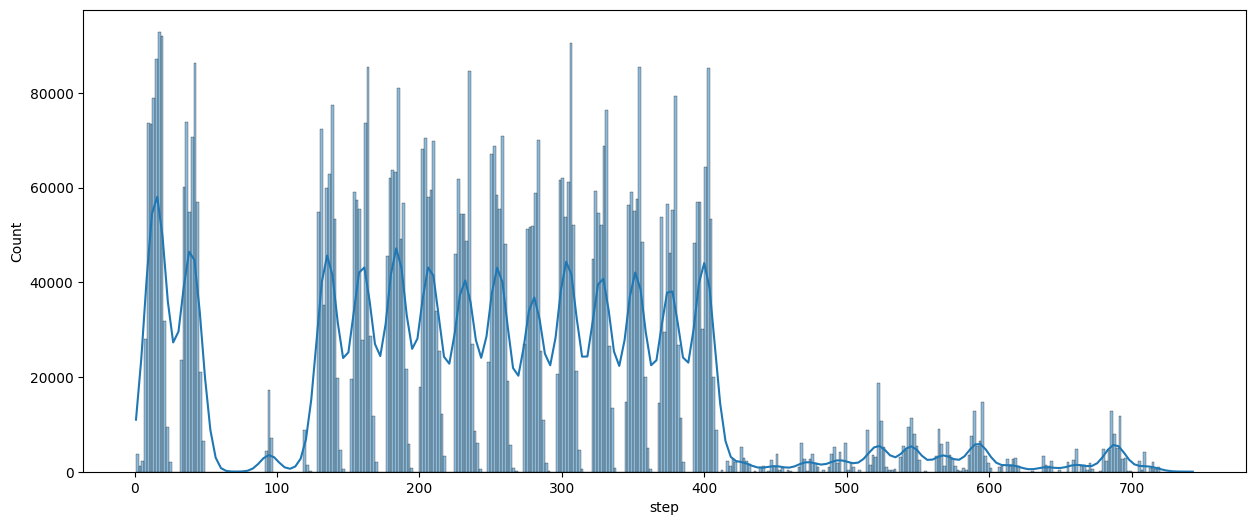

In [15]:
plt.figure(figsize=(15,6))

sns.histplot(df["step"], kde=True)

<Axes: xlabel='step', ylabel='Density'>

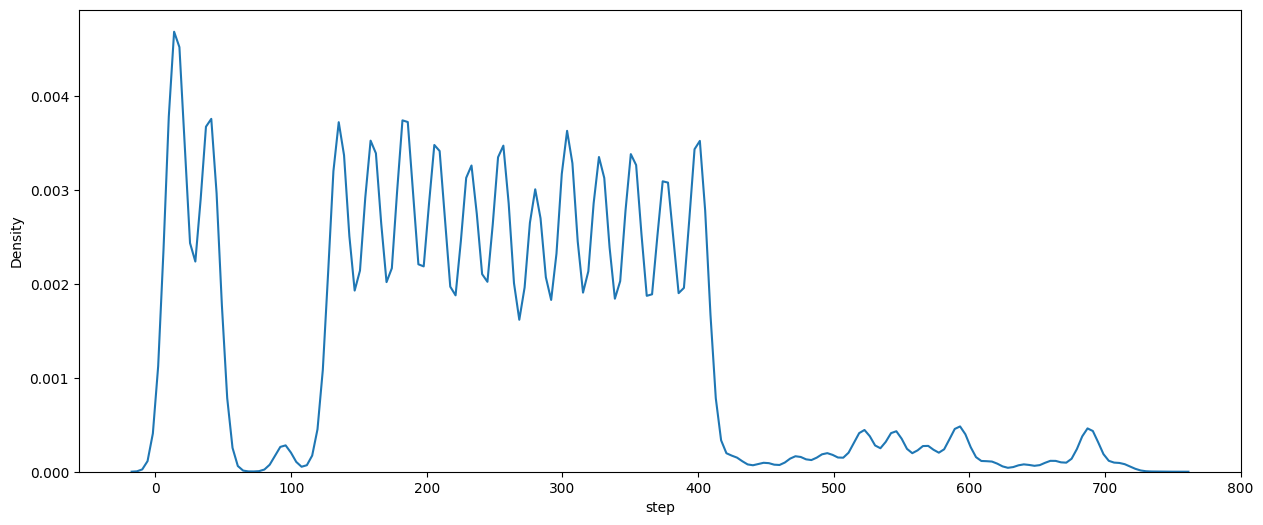

In [16]:
plt.figure(figsize=(15,6))

sns.kdeplot(df["step"])

In [23]:
obj_cols

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [19]:
for col in obj_cols:
  print(df[col].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M367627425       1
M1902904124      1
M242332837       1
M281573812       1
M1010678443      1
Name: count, Length: 2722362, dtype: int64


In [24]:
df= df.drop(['nameOrig', 'nameDest'], axis=1)

df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [22]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["type"] = le.fit_transform(df["type"])

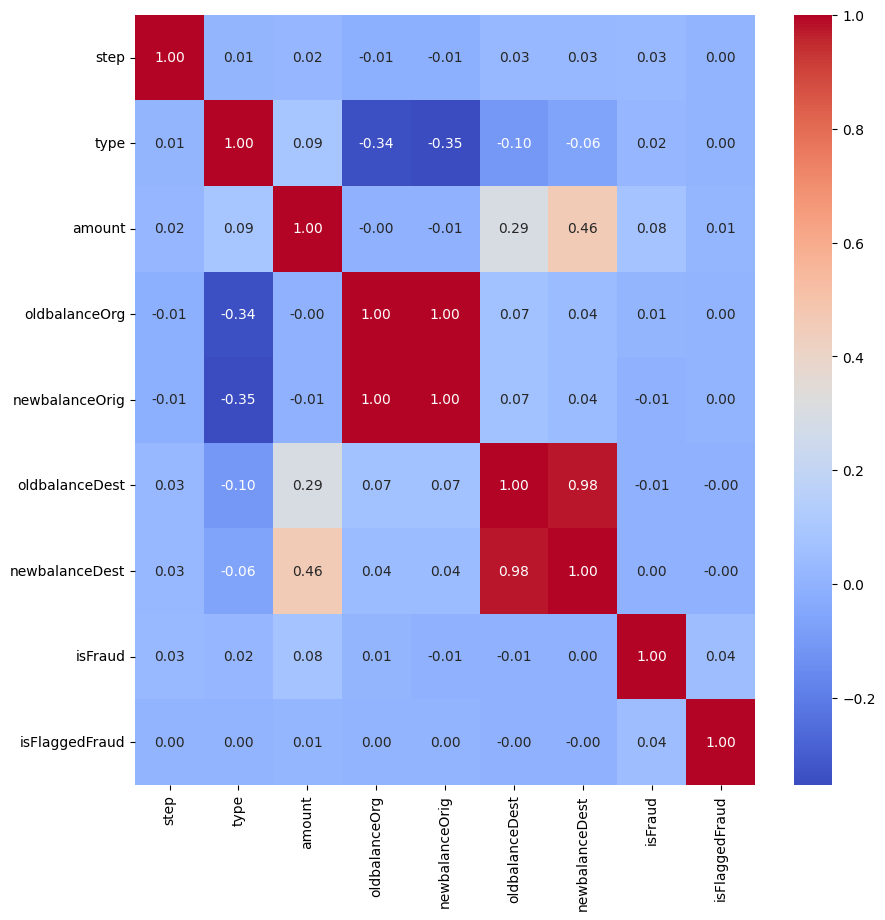

In [25]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")

plt.show()

In [26]:
X= df.drop([target], axis=1)
y= df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=13)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5090096, 8), (1272524, 8), (5090096,), (1272524,))

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = [
    LogisticRegression(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=7, criterion='entropy',random_state=13)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8837370495498835
Validation Accuracy :  0.8851407031106966

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.999972185735437
Validation Accuracy :  0.9992377508055614

RandomForestClassifier(criterion='entropy', n_esti

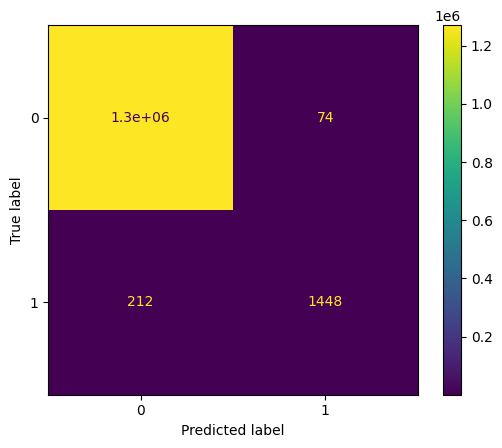

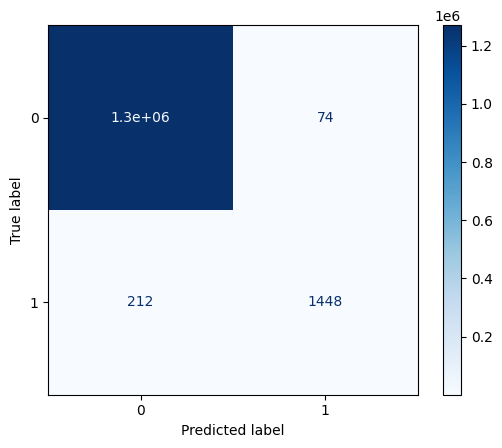

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()